# Homework #1

## Problem: Regression with gradient descent and the closed-form solution

Given the dataset data.csv, use regression to find the relation between the features and the target.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

1. Load the data (10 pts)

- Use pandas to read data.csv into a DataFrame.

- Display the first five rows to confirm correct loading.


In [2]:
df = pd.read_csv("./data/data.csv")
df[:5]

,x,y
0,-2.509198,19.407049
1,9.014286,152.015312
2,4.639879,42.793484
3,1.973170,-20.999906
4,-6.879627,101.243089


2. Visualize the data (10 pts)

- Create a scatterplot of x vs. y using matplotlib.

- Based on the plot, briefly describe what type of relationship seems appropriate.

  > This is a quadratic polynomial.


<Axes: title={'center': 'Dataset Distribution'}, xlabel='x', ylabel='y'>

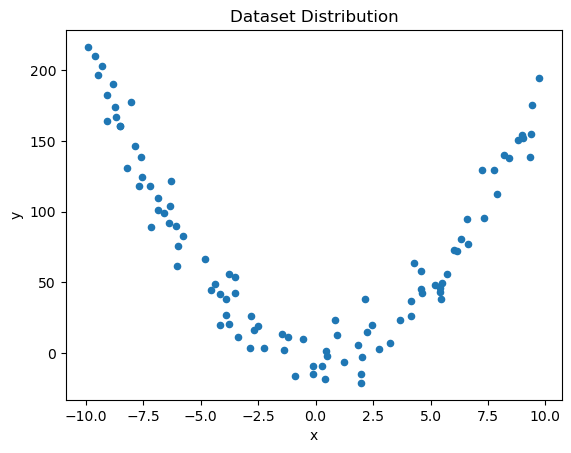

In [3]:
df.plot.scatter(0, 1, title="Dataset Distribution")

3.  Construction of the Feature Matrix (20 pts)

- Build a NumPy matrix Φ for a regression that can model the relationship you observed in point 2.

- Include a bias (column of 1’s) and explain the columns you chose.


In [4]:
phi = df["x"].to_numpy().reshape(-1, 1)
phi = np.hstack([phi**2, phi, np.ones((phi.shape[0], 1), dtype=np.float64)])
phi

array([[ 6.29607271e+00, -2.50919762e+00,  1.00000000e+00],
       [ 8.12573544e+01,  9.01428613e+00,  1.00000000e+00],
       [ 2.15284756e+01,  4.63987884e+00,  1.00000000e+00],
       [ 3.89339860e+00,  1.97316968e+00,  1.00000000e+00],
       [ 4.73292703e+01, -6.87962719e+00,  1.00000000e+00],
       [ 4.73359080e+01, -6.88010959e+00,  1.00000000e+00],
       [ 7.81160375e+01, -8.83832776e+00,  1.00000000e+00],
       [ 5.36339879e+01,  7.32352292e+00,  1.00000000e+00],
       [ 4.08969824e+00,  2.02230023e+00,  1.00000000e+00],
       [ 1.73176791e+01,  4.16145156e+00,  1.00000000e+00],
       [ 9.19356908e+01, -9.58831011e+00,  1.00000000e+00],
       [ 8.83261077e+01,  9.39819704e+00,  1.00000000e+00],
       [ 4.42072438e+01,  6.64885282e+00,  1.00000000e+00],
       [ 3.30995149e+01, -5.75321779e+00,  1.00000000e+00],
       [ 4.04941406e+01, -6.36350066e+00,  1.00000000e+00],
       [ 4.00930818e+01, -6.33190980e+00,  1.00000000e+00],
       [ 1.53284398e+01, -3.91515514e+00

4. Closed-Form Solution (35 pts)

- Derive the normal equation w = (Φᵀ Φ)⁻¹ Φᵀ y for your model.
- Implement this equation in Python (use np.linalg.pinv for stability).
- Print the weights.
- Overlay the fitted curve on the scatterplot.


In [5]:
y = df["y"].to_numpy().reshape(-1, 1)
first = phi.T @ phi
second = np.linalg.inv(first)
third = phi.T @ y
w_closed = second @ third
print(w_closed)

[[ 2.08715956]
 [-1.2984898 ]
 [-0.27981282]]


Text(0.5, 1.0, 'Regression Line using Closed Form')

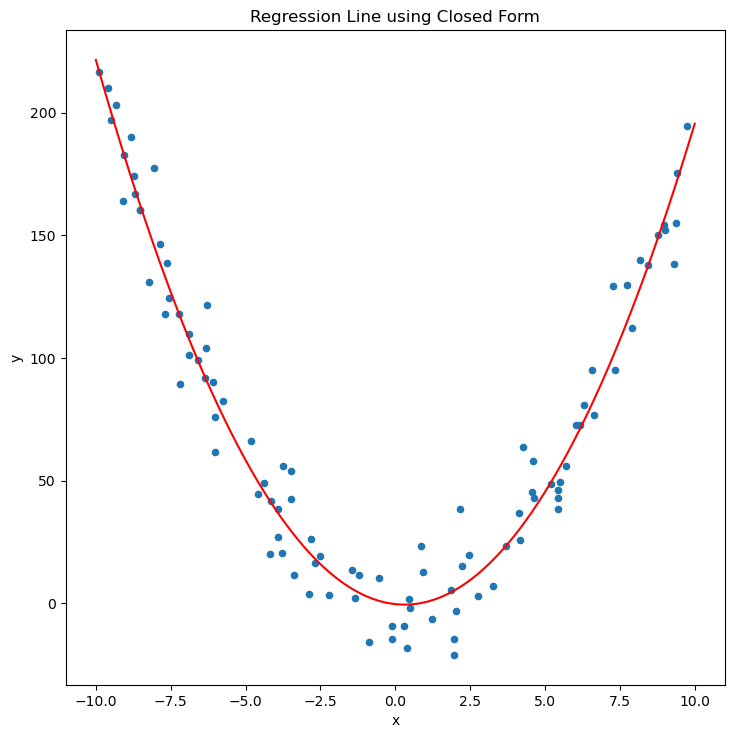

In [6]:
def make_fx(w: list):
  def f(x: float):
    return w[0] * x**2 + w[1] * x + w[2]

  return f


f = make_fx(w_closed.reshape(3))
x_curve_closed = np.linspace(-10, 10, 1000)
y_curve_closed = f(x_curve_closed)
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(8.5, 8.5))
df.plot.scatter(0, 1, ax=ax)
ax.plot(x_curve_closed, y_curve_closed, c="red")
ax.set_title("Regression Line using Closed Form")

5. Gradient descent (15 pts)

- Compute the Mean Squared Error (MSE) as the loss (use gradient descent)
- Loss = (1/m) Σ (y_i - ŷ_i)^2.
- Report this loss value and comment briefly on the quality of the fit.
  > The final loss was 188.77. The loss history indicates a good fit, dropping rapidly from 9703 in fewer than 10 iterations.


In [7]:
ITERATIONS = 100
LEARNING_RATE = 0.0001
w_gradient = np.zeros((phi.shape[1], 1), dtype=np.float64)
df_loss = pd.DataFrame(columns=["loss"], index=range(0, ITERATIONS))
for i in range(ITERATIONS):
  loss = np.mean((phi @ w_gradient - y) ** 2)
  df_loss.loc[i, "loss"] = loss
  gradient = (2 / phi.shape[0]) * phi.T @ (phi @ w_gradient - y)
  w_gradient = w_gradient - LEARNING_RATE * gradient
print(w_gradient)

[[ 2.09388516]
 [-0.67087881]
 [ 0.03101827]]


Text(0.5, 1.0, 'Regression Line using Gradient Descent')

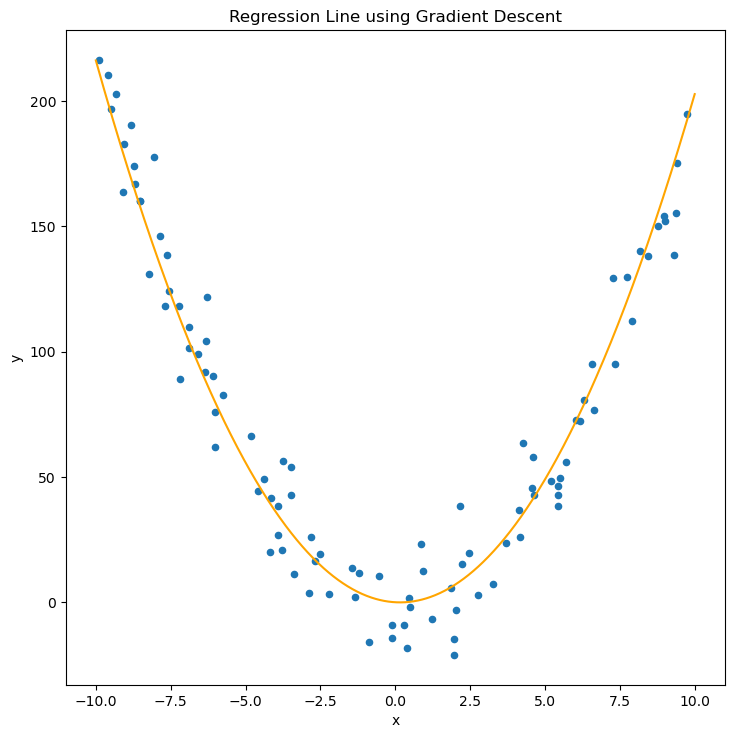

In [8]:
f = make_fx(w_gradient.reshape(3))
x_curve_gradient = np.linspace(-10, 10, 1000)
y_curve_gradient = f(x_curve_gradient)
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(8.5, 8.5))
df.plot.scatter(0, 1, ax=ax)
ax.plot(x_curve_gradient, y_curve_gradient, c="orange")
ax.set_title("Regression Line using Gradient Descent")

<Axes: title={'center': 'Loss vs Iteration'}, xlabel='iteration', ylabel='loss (MSE)'>

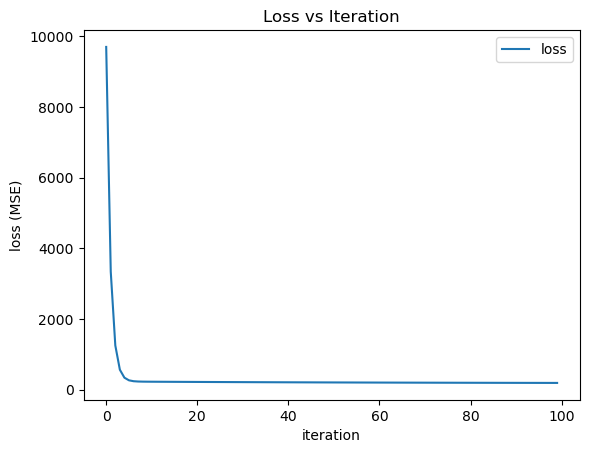

In [9]:
df_loss.plot(
  y=0,
  use_index=True,
  xlabel="iteration",
  ylabel="loss (MSE)",
  title="Loss vs Iteration",
)

6. Discussion (10 pts)

- Explain why the regression you chose was appropriate for this dataset.
  > A U-shaped scatter-plot pattern indicates a quadratic fit, which the positive x^2 coefficient subsequently confirms.
- Discuss any potential limitations or sources of error.
  > A fixed learning rate can be limiting. If it’s too large, it may overshoot minima. If it’s too small, it may get stuck on plateaus.
